# Part I - (Dataset Exploration Fifa World Cup)
## by (Onke Spengane)

## Introduction

The FIFA World Cup is a global affiliation football rivalry challenged by the senior men's public groups of individuals from the Fédération Internationale de Football Affiliation (FIFA), the game's worldwide administering body. The title has been granted like clockwork since the debut competition in 1930, in 1942 and 1946 when it was not held on account of World War two(WWII). The ongoing hero is France, which brought home its second championship at the 2018 competition in Russia.

This project highlights three datasets downloaded from Kaggle (Data Source). The first dataset contains essential match data, for example, the home team's continent, stadium, city, ref name, etc. The second dataset contains player data, for example, player name, position, etc. The last dataset includes data about the competition, for example, the champs, other participants, matches played, goals scored and so on.


## Preliminary Wrangling


In [283]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import opendatasets as op;
%matplotlib inline

### Downloading dataset from kaggle.

In [284]:
# download datasets programmatically  
url = "https://www.kaggle.com/datasets/abecklas/fifa-world-cup/download"
op.download(url, force=False)

Skipping, found downloaded files in ".\fifa-world-cup" (use force=True to force download)


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [285]:
# load the three datasets into the pandas dataframe
worldCup_matches_df = pd.read_csv('./fifa-world-cup/WorldCupMatches.csv')
worldCup_players_df = pd.read_csv('./fifa-world-cup/WorldCupPlayers.csv')
worldCup_df = pd.read_csv('./fifa-world-cup/WorldCups.csv')


### Assessig data

> Here will be assessing the datasets by checking for quality and tidiness.

#### WorldCup_matches_df

In [286]:
worldCup_matches_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [177]:
worldCup_matches_df.tail();

In [287]:
worldCup_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [288]:
match_duplicates_sum = sum(worldCup_matches_df.duplicated())

In [289]:
match_duplicates_sum

3735

In [372]:
worldCup_matches_df[worldCup_matches_df['Year'].isnull()];

In [373]:
worldCup_matches_df.iloc[[850,851]]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [292]:
worldCup_matches_df.Stage.unique();

In [293]:
worldCup_matches_df['Home Team Name'].unique();

In [294]:
worldCup_matches_df['Away Team Name'].unique();

In [295]:
len(worldCup_matches_df['Home Team Name'].unique())

79

In [296]:
len(worldCup_matches_df['Away Team Name'].unique())

84

#### WorldCup_players_df

In [297]:
worldCup_players_df.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [298]:
worldCup_players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [299]:
players_duplicate_sum = sum(worldCup_players_df.duplicated())

In [300]:
players_duplicate_sum

736

#### WorldCup_df

In [301]:
worldCup_df.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [302]:
worldCup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [303]:
worldCup_df['Country'].unique();

In [304]:
worldCup_df['Winner'].unique();

In [305]:
worldCup_df['Runners-Up'].unique();

In [306]:
worldCup_df['Third'].unique();

In [307]:
worldCup_df['Fourth'].unique();

I have assessed the data programmatically and visually displayed, I have identified some issues in the datasets, the following issues are addressed in the following cells.

#### WorldCup_match_df data

- Stage column has inconsistent values
- Some rows are duplicated
- There are some datatype that are incorrect should be int instead of float
- There is a lot of rows with NaN values

#### WorldCup_players_df data

- Some rows in the data are duplicated

#### WorldCup_df data

- The 'Attendence' column has got incorrect datatype

### Cleaning data

> Here will be tiding up and improving the quality of the datasets and try to make is as clean as possible.

In [308]:
matches_clean_df = worldCup_matches_df.copy()

In [309]:
# dropping duplicated data

matches_clean_df.drop_duplicates(inplace = True)

In [310]:
# dropping rows with NaN values

matches_clean_df.dropna(inplace = True)

The stage column has got incosistent values will be replacing them so that we can have consistent values

In [311]:
# inconsistent values are replace
old_data_groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']

new_data_groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F'] 

old_stage_runUps = ['Match for third place', 'Play-off for third place']

new_stage_runUps = 'Third place'

matches_clean_df['Stage'].replace(old_data_groups, new_data_groups, inplace = True)

matches_clean_df['Stage'].replace(old_stage_runUps, new_stage_runUps, inplace = True)

In [312]:
matches_clean_df;

In [313]:
matches_clean_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  835 non-null    float64
 1   Datetime              835 non-null    object 
 2   Stage                 835 non-null    object 
 3   Stadium               835 non-null    object 
 4   City                  835 non-null    object 
 5   Home Team Name        835 non-null    object 
 6   Home Team Goals       835 non-null    float64
 7   Away Team Goals       835 non-null    float64
 8   Away Team Name        835 non-null    object 
 9   Win conditions        835 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  835 non-null    float64
 12  Half-time Away Goals  835 non-null    float64
 13  Referee               835 non-null    object 
 14  Assistant 1           835 non-null    object 
 15  Assistant 2           8

As some column have incorrect datatypes will be sorting that out and will also change "Datetime" datatype to a differnt one.

In [314]:
# changing columns from float datatype to int

for column in matches_clean_df.columns:
    if matches_clean_df[column].dtype == float:
        matches_clean_df[column] = matches_clean_df[column].astype(int)

In [315]:
# changing column "Datatime" to a diffent datatype

matches_clean_df.Datetime = pd.to_datetime(matches_clean_df.Datetime)

In [316]:
# here will be extracting the month from 'Datatime' column

months = {0: 'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

matches_clean_df['Month'] = matches_clean_df['Datetime'].dt.month.map(months)

I will be a adding a new columns to the matches_clean_df  which contains the corresponding continent of each country.

In [317]:
continents = pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

In [318]:
continents.sample(5)

,Continent,Country
28,Africa,Madagascar
157,North America,Haiti
37,Africa,Nigeria
43,Africa,Somalia
117,Europe,Hungary


Here I will be changing country names at the time of tournaments to new names

In [319]:
old_country_name = ['rn">United Arab Emirates', 'rn">Republic of Ireland', 
            'rn">Trinidad and Tobago', 'rn">Serbia and Montenegro',
            "C�te d'Ivoire", 'rn">Bosnia and Herzegovina',
           ]

new_country_name = ['United Arab Emirates', 'Republic of Ireland', 
            'Trinidad and Tobago', 'Serbia and Montenegro',
            "Cote d'Ivoire", 'Bosnia and Herzegovina',
           ]
    
matches_clean_df[['Home Team Name', 'Away Team Name']] = (
    matches_clean_df[['Home Team Name', 'Away Team Name']].replace(old_country_name, new_country_name)
)

The are countries with missing continents in the 'continent file', if any exist, will be are added manually.

In [320]:
home_countries = matches_clean_df['Home Team Name']

away_countries = matches_clean_df['Away Team Name']

In [322]:
missing_home = home_countries[~home_countries.isin(continents.Country)].unique()
missing_home;

In [323]:
missing_away = away_countries[~away_countries.isin(continents.Country)].unique()
missing_away;

In [324]:
additional_continents = {'England': 'Europe', 'Wales': 'Europe', 'Scotland': 'Europe', 
                         'Republic of Ireland': 'Europe', 'Northern Ireland': 'Europe',
                         'USA': 'North America', 'Congo DR': 'Africa', 
                         "Cote d'Ivoire": 'Africa', 'Korea DPR': 'Asia',
                         'Dutch East Indies': 'Asia', 'Korea Republic': 'Asia',
                         'Germany FR': 'Europe', 'Soviet Union': 'Asia', 
                         'German DR': 'Europe', 'Zaire': 'Africa', 'Russia': 'Asia', 
                         'China PR': 'Asia', 'Czech Republic': 'Europe',
                         'Serbia and Montenegro': 'Europe', 'IR Iran': 'Asia',
                         'Yugoslavia': 'Europe', 'Czechoslovakia': 'Europe'
                        }


In [325]:
# here I will be convert additional_contents to dataframe

additional_continents_df = pd.DataFrame(additional_continents.items(), columns=['Country', 'Continent'])
additional_continents_df;


In [326]:
# here will be adding 'additional_continents_df' to 'continents'
continent = continents.append(additional_continents_df)
continent

C:\Users\Anele\AppData\Local\Temp\ipykernel_6148\2188811496.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  continent = continents.append(additional_continents_df)


,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
17,Europe,Czech Republic
18,Europe,Serbia and Montenegro
19,Asia,IR Iran
20,Europe,Yugoslavia


In [327]:
# here will create two new columns corresponding to the continents of Home and Away countries on the data that we already have.

matches_clean_df = pd.merge(continent, matches_clean_df, right_on = 'Home Team Name', left_on = 'Country')

matches_clean_df = pd.merge(continent, matches_clean_df, right_on = 'Away Team Name', left_on = 'Country')
matches_clean_df;

In [328]:
# renaming columns

matches_clean_df.rename(columns = {'Continent_x' : 'Away Team Continent', 'Continent_y' : 'Home Team Continent'}, inplace = True) 

In [329]:
# droping unwanted columns columns

matches_clean_df.drop(columns = ['Country_x', 'Country_y'], inplace = True)
matches_clean_df;

In [330]:
players_clean_df = worldCup_players_df

In [331]:
# drop duplicates
players_clean_df.drop_duplicates(inplace = True)

In [332]:
players_clean_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


Here will be sorting attendance values by year.

In [364]:
worldCup_clean_df = worldCup_df

In [365]:
sort_attendance = list(matches_clean_df.query('Stage == "Final"').sort_values(by= "Year").Attendance.values)
sort_attendance.insert(3, 173850)


In [366]:
worldCup_clean_df["Attendance"] = sort_attendance
worldCup_clean_df

,Year,Host Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,68346
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,55000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,45000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,173850
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,62500
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,49737
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,68679
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,96924
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,107412
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,78200


In [367]:
# will be renaming 'Country' column in 'world_clean_df' to avoid overlapping when merging

worldCup_clean_df.rename(columns = {'Country': 'Host Country'}, inplace = True)

In [368]:
columns = ['Winner', 'Runners-Up', 'Third', 'Fourth']

for column in columns:
    worldCup_clean_df= pd.merge(continent, worldCup_clean_df, right_on = column, left_on = 'Country')
    worldCup_clean_df.drop('Country', axis = 1, inplace = True)
    new_name = column + ' Continent'
    worldCup_clean_df.rename(columns = {'Continent': new_name}, inplace = True)

worldCup_clean_df.head()

,Fourth Continent,Third Continent,Runners-Up Continent,Winner Continent,Year,Host Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,Europe,Europe,Europe,Europe,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,55000
1,Europe,Europe,Europe,South America,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,114600
2,Europe,Europe,Europe,South America,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,94194
3,Europe,Europe,Europe,Europe,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,90000
4,Europe,South America,Europe,South America,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,71483


In [369]:
worldCup_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fourth Continent      20 non-null     object
 1   Third Continent       20 non-null     object
 2   Runners-Up Continent  20 non-null     object
 3   Winner Continent      20 non-null     object
 4   Year                  20 non-null     int64 
 5   Host Country          20 non-null     object
 6   Winner                20 non-null     object
 7   Runners-Up            20 non-null     object
 8   Third                 20 non-null     object
 9   Fourth                20 non-null     object
 10  GoalsScored           20 non-null     int64 
 11  QualifiedTeams        20 non-null     int64 
 12  MatchesPlayed         20 non-null     int64 
 13  Attendance            20 non-null     int64 
dtypes: int64(5), object(9)
memory usage: 2.3+ KB


## Univariate Exploration

### What number of counties from the different continents have participated in the FIFA World Cup?

In [338]:
top_participants_continent = (matches_clean_df
                   .groupby(['Year', 'Away Team Name', 'Away Team Continent'], as_index=False)
                   .count()['Away Team Continent']
                   .value_counts()
                   .head()
                  )

Europe           210
South America     73
Asia              44
North America     39
Africa            39
Name: Away Team Continent, dtype: int64

C:\Users\Anele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


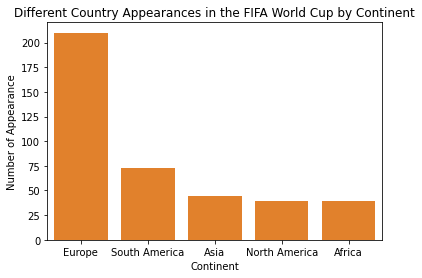

In [339]:
base_color = sb.color_palette()[1]
display(top_participants_continent)
sb.barplot(top_participants_continent.index, top_participants_continent, color=base_color)
plt.xlabel('Continent')
plt.ylabel('Number of Appearance')
plt.title('Different Country Appearances in the FIFA World Cup by Continent');

As displayed by the graph above the Countries from the Europe continet have the most apperances in the FIFA World Cup over the years.

### How does participation change over the past tournaments?

Year
1930     590549
1934     363000
1938     375700
1950    1045246
1954     768607
Name: Attendance, dtype: int32

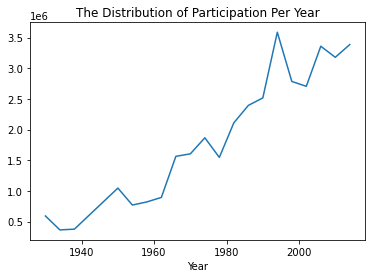

In [370]:
data = matches_clean_df.groupby(['Year'], as_index=True).sum()['Attendance']
display(data.head())
data.plot()
plt.title('The Distribution of Participation Per Year');

The graph above displays the number of people who attended the  FIFA Workd Cup tournament over the years, as we can see that the numbers have been increasing over the years but in some years it has dropped from the previous year and then increase again the following year.

### What number of countries have taken part in the FIFA World Cup?

In [341]:
top_participants_countries = (matches_clean_df
                   .groupby(['Year', 'Away Team Name'], as_index = False)
                   .count()['Away Team Name']
                   .value_counts()
                   .head()
                  )

This is the number of countries that have participated in the FIFA World Cup
83


Argentina    16
Brazil       15
Mexico       15
Italy        14
France       14
Name: Away Team Name, dtype: int64

C:\Users\Anele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


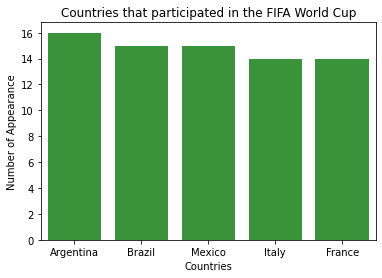

In [342]:
print("This is the number of countries that have participated in the FIFA World Cup")
print(len(matches_clean_df['Away Team Name'].unique()))
display(top_participants_countries)
sb.barplot(top_participants_countries.index, top_participants_countries, color = sb.color_palette()[2])
plt.xlabel('Countries')
plt.ylabel('Number of Appearance')
plt.title('Countries that participated in the FIFA World Cup');

The bar graph above displays the number of different countries apperances in the FIFA tournament over the years with Agentina having the most apperances and the total number of countries that have participated is 83.

### What is the recurrence of the matches played each month?

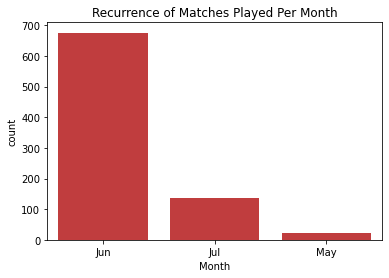

In [343]:
sb.countplot(data=matches_clean_df, x='Month', color = sb.color_palette()[3])
plt.title('Recurrence of Matches Played Per Month');

The graph above shows us that most of the matches are played in June over the years in the FIFA World Cup tournament.

### Which country has facilitated the World Cup the most?

Italy     2
Mexico    2
France    2
Name: Host Country, dtype: int64

C:\Users\Anele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


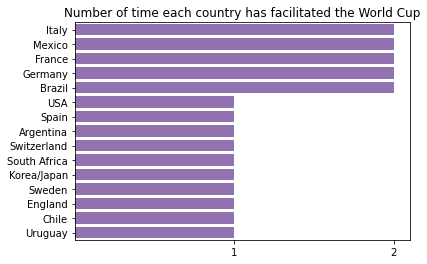

In [344]:
data2 = worldCup_clean_df['Host Country'].value_counts()
display(data2.head(3))
sb.barplot(data2, data2.index, color = sb.color_palette()[4])
plt.xticks([1, 2])
plt.xlabel('')
plt.title('Number of time each country has facilitated the World Cup');

Above graph displays that Italy, Mexico, France, Germany anad Brazil have facilitated the FIFA World Cup tornament 2 times as Korea and Japan joint facilitated it once, other countries have facilitated the tournament once as well.

### Which coach holds the most record of games managed?

In [345]:
# drop duplicated matches to a new variable

data_frame = players_df.drop_duplicates(['MatchID', 'Team Initials'])

SCHOEN Helmut (FRG)              25
PARREIRA Carlos Alberto (BRA)    23
SCOLARI Luiz Felipe (BRA)        21
ZAGALLO Mario (BRA)              20
MILUTINOVIC Bora (YUG)           20
Name: Coach Name, dtype: int64

C:\Users\Anele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


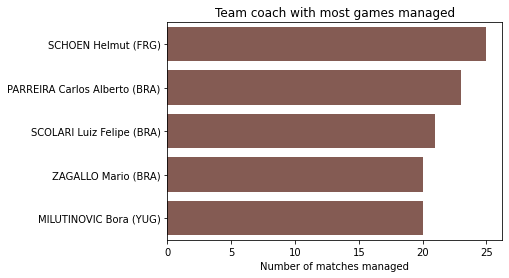

In [346]:
coach = data_frame['Coach Name'].value_counts().head(5)
display(coach) 
sb.barplot(coach, coach.index, color = sb.color_palette()[5]);
plt.xlabel('Number of matches managed')
plt.title('Team coach with most games managed');

Above graph displays that Schoen Helmut is the coach with the most game managed.

### Which player has the highest number of matches played?

Player Name
RONALDO        33
KLOSE          32
M�LLER         28
OSCAR          28
JULIO CESAR    26
Name: RoundID, dtype: int64

C:\Users\Anele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


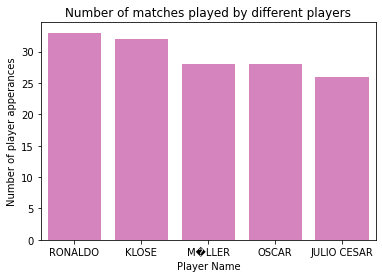

In [347]:
sum(players_df.duplicated(['MatchID', 'Player Name']))
player_match = (players_df
                .groupby(['Player Name'])
                .count()['RoundID']
                .sort_values(ascending = False)
                .head()
               )
display(player_match)
sb.barplot(player_match.index, player_match, color = sb.color_palette()[6]);
plt.ylabel('Number of player apperances')
plt.title('Number of matches played by different players');

## Bivariate Exploration

### What impact does a country's continent have on the appearance of spectators?

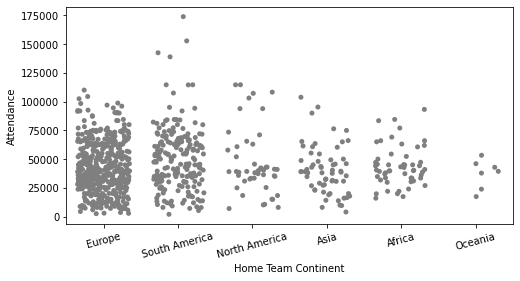

In [348]:
display_color = sb.color_palette()[7]
plt.figure(figsize = (8, 4))
sb.stripplot(data = matches_clean_df, x = 'Home Team Continent', y = 'Attendance', color = display_color, jitter = 0.35)
plt.xticks(rotation = 15);

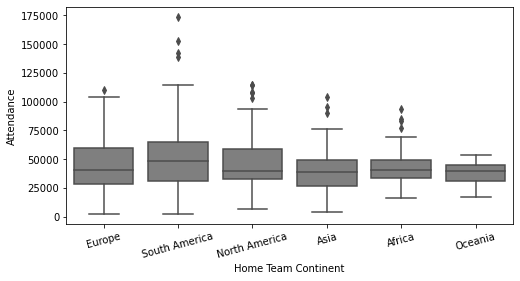

In [349]:
plt.figure(figsize = (8, 4))
sb.boxplot(data = matches_clean_df, x = 'Home Team Continent', y = 'Attendance', color = display_color)
plt.xticks(rotation = 15);

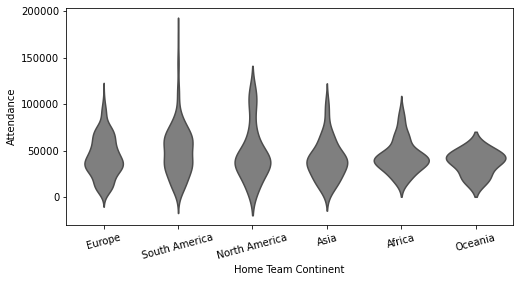

In [350]:
plt.figure(figsize = (8, 4))
sb.violinplot(data = matches_clean_df, x = 'Home Team Continent', y = 'Attendance', color = display_color, inner = None)
plt.xticks(rotation = 15);

Displayed on the graphs above countries in South America has better turn out of spectators than others over the years of the FIFA World Cup tournament.

### Which month is the FIFA World Cup Final played the most?

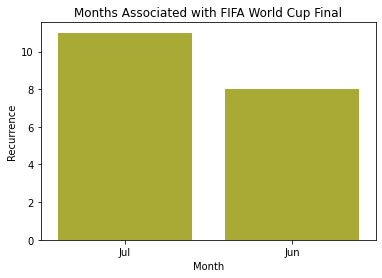

In [351]:
final_matches = matches_clean_df.loc[matches_clean_df['Stage'] == 'Final']
sb.countplot(data = final_matches, x = 'Month', color = sb.color_palette()[8])
plt.ylabel('Recurrence')
plt.title('Months Associated with FIFA World Cup Final');

Bar graph above displays the months that the tournament finals in, as we can see over the years of the tournament the final is mostly played in the Month of July. 

## Multivariate Exploration

### Which country has the highest number of FIFA World Cup trophies?

Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
Name: Winner, dtype: int64

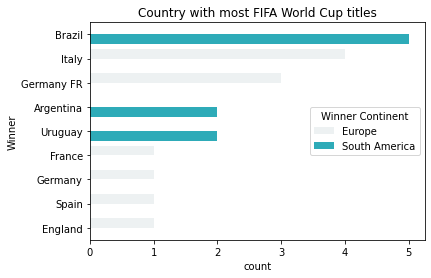

In [352]:
winners = worldCup_clean_df.Winner.value_counts()
display(winners.head())
sb.countplot(data = worldCup_clean_df, y ='Winner', hue = 'Winner Continent', order = winners.index, color = sb.color_palette()[9] )
plt.title('Country with most FIFA World Cup titles');

The above graph displays that Brazil a country in South America has the most FIFA World Cup trophies than other countries over the years of the tournament.

### What is the highest goal scored in a single match by a away team?

,Away Team Name,Away Team Goals,Away Team Continent
221,Germany,7,Europe
306,Poland,7,Europe
349,Spain,5,Europe


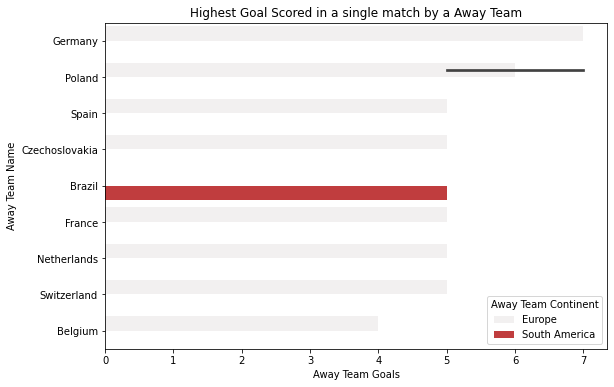

In [353]:
away_team_goals = (matches_clean_df
                   .sort_values(by = 'Away Team Goals', ascending=False)
                   [['Away Team Name', 'Away Team Goals', 'Away Team Continent']].head(10)
                  )
display(away_team_goals.head(3)) 
plt.figure(figsize = (9, 6))
sb.barplot(data = away_team_goals, y = 'Away Team Name', x = 'Away Team Goals', hue = 'Away Team Continent', color = sb.color_palette()[3])
plt.title('Highest Goal Scored in a single match by a Away Team');

As displayed by the graph above Germany highest Goal Scored in a single match by a Away Team in th Fifa World Cup tournament.

### How does the attendance fluctuate over the past finals?

Year
1930     68346
1934     55000
1938     45000
1950    173850
1954     62500
Name: Attendance, dtype: int64

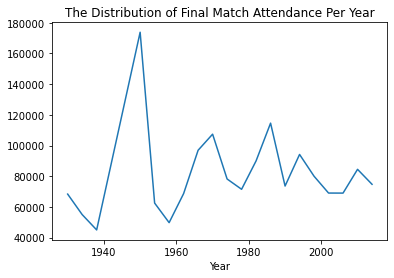

In [371]:
data3 = worldCup_clean_df.groupby(['Year'], as_index = True).sum()['Attendance']
display(data3.head())
data3.plot()
plt.title('The Distribution of Final Match Attendance Per Year');

## Conclusions

In conclusion to the project I learnt alot as I was analysing and visualizing these datasets, I managed to retrieve information I was not aware of such as and answered few questions such as:
- Countries from the Europe continet have the most apperances in the FIFA World Cup over the years.
- The number of people who attended the FIFA World Cup tournament over the years, the numbers have been increasing over the years but in some years it has dropped from the previous year and then increase again the following year.
- The number of different countries apperances in the FIFA tournament over the years with Agentina having the most apperances and the total number of countries that have participated is 83.
- Italy, Mexico, France, Germany and Brazil have facilitated the FIFA World Cup tornament 2 times as Korea and Japan joint facilitated it once, other countries that have facilitated the tournament have done it once.
- Brazil a country in South America has the most FIFA World Cup trophies than other countries over the years of the tournament.
- RONALDO has the highest number of match played.